In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

In [246]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Features and target

In [248]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

### categorical and numeric features

In [250]:
cat_features = ["Fuel_Type", "Selling_type", "Transmission"]
num_features = [col for col in X.columns if col not in cat_features]

### Preprocessing pipeline

In [252]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

### Model pipeline

In [254]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

### Train/test spit

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
for column in X_train.columns:
    if 'Bajaj Pulsar 150' in X_train[column].values:
        print(f"The problematic column is: '{column}'")
        print(f"Data type of '{column}': {X_train[column].dtype}")
        break

The problematic column is: 'Car_Name'
Data type of 'Car_Name': object


In [258]:
print("Current numeric_features:", num_features)
print("Current categorical_features:", cat_features)

Current numeric_features: ['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Owner']
Current categorical_features: ['Fuel_Type', 'Selling_type', 'Transmission']


In [259]:
num_features.remove('Car_Name')  # Remove from numeric list
cat_features.append('Car_Name') # Add to categorical list

In [260]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
])

In [261]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

### Train Model

In [263]:
# 1. Find the problematic column
problem_value = 'Bajaj Pulsar 150'
problem_column = None

for column in X_train.columns:
    if problem_value in X_train[column].values:
        problem_column = column
        break

if problem_column:
    print(f"Found problem! The value '{problem_value}' is in column: '{problem_column}'")
    print(f"Data type of '{problem_column}': {X_train[problem_column].dtype}")
else:
    print("Could not find the column. Please check your data manually.")

# 2. Check your current feature lists
print("\nCurrent numeric_features list:", num_features)
print("Current categorical_features list:", cat_features)

# 3. Check if the problem column is in the wrong list
if problem_column in num_features:
    print(f"\nERROR: '{problem_column}' is in the numeric_features list but contains text!")
    # You need to move it to categorical_features or remove it
    # numeric_features.remove(problem_column)
    # categorical_features.append(problem_column) # Uncomment if it's a useful category
else:
    print(f"\nThe column '{problem_column}' is not in numeric_features. The error might be elsewhere.")

# 4. After fixing the lists, remember to rebuild your pipeline and fit again.

Found problem! The value 'Bajaj Pulsar 150' is in column: 'Car_Name'
Data type of 'Car_Name': object

Current numeric_features list: ['Year', 'Present_Price', 'Driven_kms', 'Owner']
Current categorical_features list: ['Fuel_Type', 'Selling_type', 'Transmission', 'Car_Name']

The column 'Car_Name' is not in numeric_features. The error might be elsewhere.


In [264]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission',
                                                   'Car_Name'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

### Predictions & Evaluation

In [265]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Cross-Val Score:", cross_val_score(model, X, y, cv=5).mean())

C:\Users\DoggyDigital\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R² Score: 0.9630604002008216
MAE: 0.61492213114754


C:\Users\DoggyDigital\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\DoggyDigital\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\DoggyDigital\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\DoggyDigital\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-Val Score: 0.3601256117113268


C:\Users\DoggyDigital\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [266]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # <-- This is crucial
])

### Feature importance

In [267]:
regressor = model.named_steps["regressor"]
importances = regressor.feature_importances_

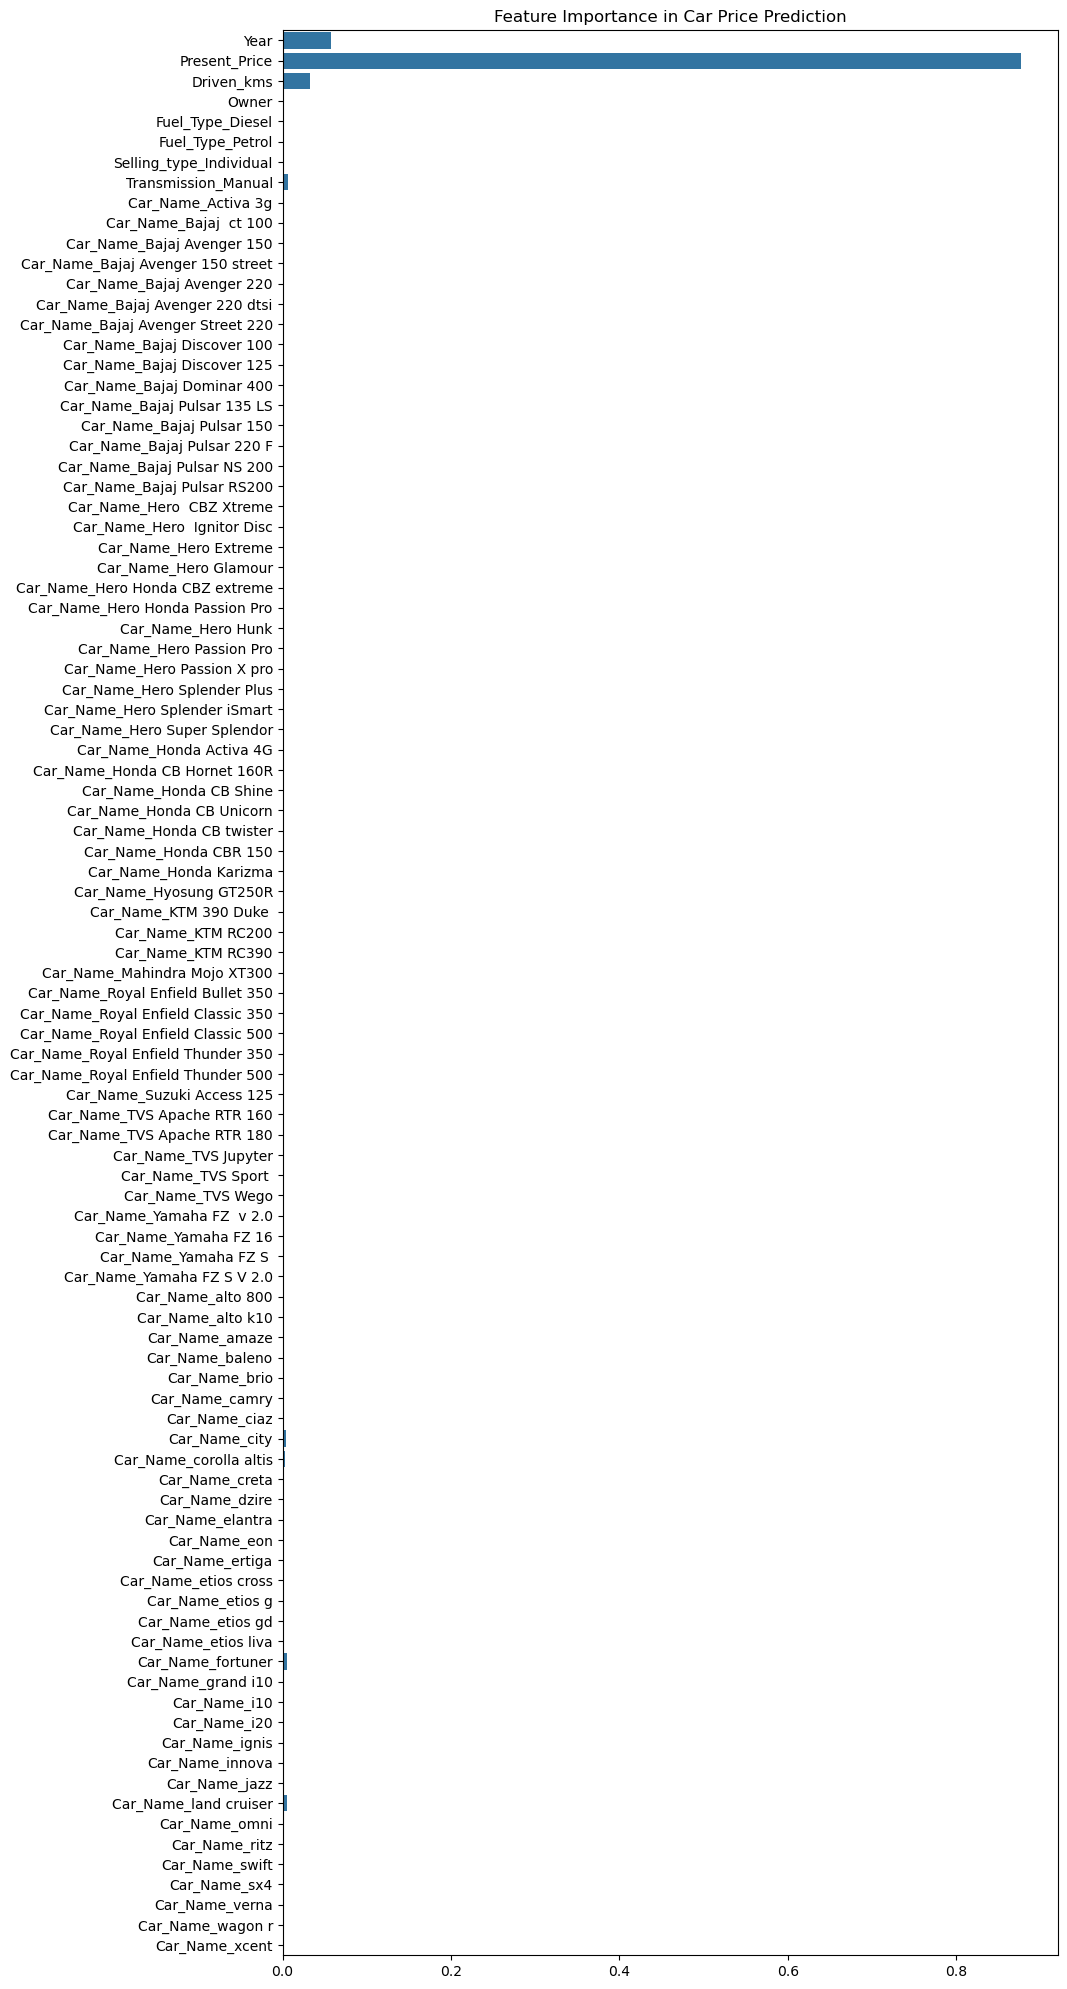

In [268]:
plt.figure(figsize=(10,25))
sns.barplot(x=importances, y=num_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(cat_features)))
plt.title("Feature Importance in Car Price Prediction")
plt.show()